In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import numpy as np

In [2]:
#!pip install matplotlib update

  Using cached matplotlib-2.0.2-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 194kB 1.2MB/s ta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached pytz-2017.2-py2.py3-none-any.whl
  Using cached numpy-1.13.0-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl


In [3]:
with open('sensitive_analysis_44.pkl','r') as inputs:
    data = pickle.load(inputs)

In [4]:
!pip install numpy

In [5]:
mitigation = []
utility = []
price = []

In [6]:
for i in range(len(data)):
    mitigation.append(data[i][2])
    utility.append(data[i][3])
    price.append(data[i][4])

In [7]:
from tree import TreeModel 

In [9]:
decision_times=[0, 15, 45, 85, 185, 285, 385]
t = TreeModel(decision_times)

In [10]:
nodes_index = []
for i in range(t.num_periods):
    nodes_index.append(t.get_nodes_in_period(i))
nodes_index

[(0, 0), (1, 2), (3, 6), (7, 14), (15, 30), (31, 62)]

In [11]:
price_stat_ave = np.zeros((len(data), t.num_periods))

In [12]:
for i in range(len(data)):
    for j in range(t.num_periods):
        price_stat_ave[i,j] = np.average(data[i][4][nodes_index[j][0]:nodes_index[j][1]+1])

list0 = price_stat_ave[:,0]
list1 = price_stat_ave[:,1]
list2 = price_stat_ave[:,2]
list3 = price_stat_ave[:,3]
list4 = price_stat_ave[:,4]
list5 = price_stat_ave[:,5]

In [13]:
list0

array([ 70.70294342,  60.99318837,  68.05453809,  69.23046701,
        67.78508898,  66.93014789,  68.3873694 ,  65.03549799,
        69.5141523 ,  67.74174267,  70.85464791,  58.06232256,
        67.48263481,  63.423827  ,  65.88115101,  66.22760779,
        67.12597135,  68.32665733,  68.36098983,  70.15651501,
        69.36553397,  69.58913213,  69.24235487,  66.36611025,
        66.43789147,  65.8876672 ,  66.58433317,  68.19918905,
        66.31413493,  66.21952781,  63.85967263,  67.01492582,
        62.54358647,  57.03344075,  66.07711926,  68.41376662,
        54.2932501 ,  66.73697114,  67.89015422,  66.64721385,
        69.18931723,  67.74204959,  67.62475047,  64.78325323])

In [14]:
list_ = [list0,list1,list2,list3,list4,list5]
for i in range(len(list_)):
    list_[i]=np.sort(list_[i])[2:42]
list_min = []
list_max = []
for i in list_:
    list_min.append(i[0])
    list_max.append(i[-1])   

In [15]:
price_period_ave = []
for i in range(t.num_periods):
    price

In [59]:
sum_price = np.zeros(t.num_decision_nodes)
for j in range(len(data)):
    sum_price += data[i][4]
average_price = sum_price/len(data)
average_price

array([  6.69301479e+01,   1.15612845e+02,   3.51061724e+01,
         1.57960457e+02,   8.13640125e+01,   5.90376017e+01,
         1.17299336e+01,   1.52532504e+02,   1.41944989e+02,
         1.16344764e+02,   3.10786838e+01,   8.63114735e+01,
         1.55585464e+01,   1.26496398e+01,   5.77039650e+00,
         2.17319445e+01,   2.03208130e+01,   2.27601135e+01,
         2.09509558e+01,   3.39985144e+01,   3.22809208e+01,
         2.27983197e+01,   7.94453353e+00,   4.73277414e+01,
         4.55782601e+01,   1.65249266e+01,   4.77000661e+00,
         1.06178798e+01,   5.83735965e+00,   5.65913381e+00,
         1.59383458e+00,   3.78343073e+00,   3.59314444e+00,
         3.90093473e+00,   3.71731183e+00,   3.87819480e+00,
         3.68781003e+00,   4.09182869e+00,   3.05530672e+00,
         3.91955187e+00,   3.72393398e+00,   4.01163357e+00,
         3.63644055e+00,   1.10706670e+01,   1.08236812e+01,
         1.71042182e+01,   2.95811802e+00,   4.63868629e+00,
         4.43766908e+00,

In [82]:
average_price_period=[] 
average_price_period.append(average_price[0])
for i in range(1,len(nodes_index)):
    average_price_period.append(np.average(average_price[range(nodes_index[i][0],nodes_index[i][1])]))

In [83]:
average_price_period

[66.930147885630177,
 115.61284492677568,
 99.454023890010731,
 79.488657117967946,
 21.273428220729645,
 6.0365997966131761]

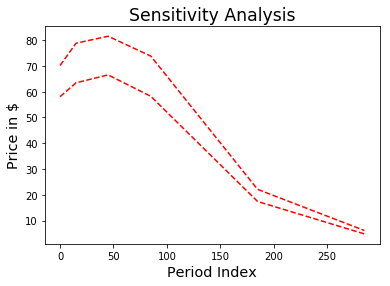

In [16]:
plt.figure()
plt.plot(decision_times[:-1],list_min, 'r--')
plt.plot(decision_times[:-1],list_max,'r--')
plt.title('Sensitivity Analysis', size ='xx-large')
plt.ylabel('Price in $', size = 'x-large')
plt.xlabel('Period Index', size = 'x-large')
plt.savefig('sensitive_analysis')
#plt.xlim(decision_times)